**1. Framing the problem statement**
---------------------------------------------------------------------------------

Here,we are trying to predict the survival chances of Titnic dataset. It is a classification modelling. Target variable is **Survived**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# importing datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print('train shape:',train.shape)
print('test shape:',test.shape)

print('train columns:',train.columns)
print('test columns:',test.columns)

# combined dataset
dataset = [train,test]

# categorical columns:
catCols=train.select_dtypes('object').columns
catCols = list(set(catCols))
# as Name is unique so it is irrelevant
catCols.remove('Name')


print('categorical columns:',catCols)

# numerical columns
numCols = train.select_dtypes('number').columns
numCols = list(set(numCols))


# as 'Survived' is the target variable
# so we will remove from numerical columns
numCols.remove('Survived')

# as passengerId is unique so it is irrelevant
numCols.remove('PassengerId')

print('numerical columns:',numCols)

# 2 from numeric colums and 1 from cat cols are removed

train shape: (891, 12)
test shape: (418, 11)
train columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
test columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
categorical columns: ['Embarked', 'Ticket', 'Cabin', 'Sex']
numerical columns: ['Fare', 'Pclass', 'SibSp', 'Parch', 'Age']


2 .Hypothesis Testing
-----------------------------------------------------------------
Null Hypothesis:there is no relationship between predictor and target

Alternate Hypothesis:There is significant relationship between predictor and target.

In [2]:
# we will carry out z-test as below for numeric columns:

from statsmodels.stats import weightstats as stests

significant_num = []
in_significant_num = []
for i in numCols:
  p_val = stests.ztest(train[i],train.Survived)
  p_val = p_val[1]
  print('columns:',i)
  print('p val:',p_val)

  if p_val < 0.05 :
    status = "Reject Null Hypothesis,Significant predictors"
    print('status:',status)
    significant_num.append(i)
  else:
    status = 'Accept Null Hypothesis,Insignificant predictors'
    print('status:',status)
    in_significant_num.append(i)

print("significant:",significant_num,len(significant_num))
print("Insignificant:",in_significant_num,len(in_significant_num))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


columns: Fare
p val: 1.975819077461426e-81
status: Reject Null Hypothesis,Significant predictors
columns: Pclass
p val: 0.0
status: Reject Null Hypothesis,Significant predictors
columns: SibSp
p val: 0.0005679094274576065
status: Reject Null Hypothesis,Significant predictors
columns: Parch
p val: 0.943268365860492
status: Accept Null Hypothesis,Insignificant predictors
columns: Age
p val: nan
status: Accept Null Hypothesis,Insignificant predictors
significant: ['Fare', 'Pclass', 'SibSp'] 3
Insignificant: ['Parch', 'Age'] 2


In [3]:
# we will carry out chi-square test for categorical features

from scipy.stats import chi2_contingency
significant_cat = []
in_significant_cat = []
for i in catCols:
  stat,p,dof,ex = chi2_contingency(pd.crosstab(train[i],train.Survived))
  
  print('columns:',i)
  print('p val:',p_val)

  if p_val < 0.05 :
    status = "Reject Null Hypothesis,Significant predictors"
    print('status:',status)
    significant_cat.append(i)
  else:
    status = 'Accept Null Hypothesis,Insignificant predictors'
    print('status:',status)
    in_significant_cat.append(i)

print("significant:",significant_cat,len(significant_cat))
print("insignificant:",in_significant_cat,len(in_significant_cat))

columns: Embarked
p val: nan
status: Accept Null Hypothesis,Insignificant predictors
columns: Ticket
p val: nan
status: Accept Null Hypothesis,Insignificant predictors
columns: Cabin
p val: nan
status: Accept Null Hypothesis,Insignificant predictors
columns: Sex
p val: nan
status: Accept Null Hypothesis,Insignificant predictors
significant: [] 0
insignificant: ['Embarked', 'Ticket', 'Cabin', 'Sex'] 4


In [4]:
# NEED TO ReMOVE THIS as nANs are there

# # # the we will see the OLS summary
# import statsmodels.api as sm
# a= train[['SibSp', 'Age', 'Parch', 'Fare', 'Pclass']]
# print(a)
# model=sm.OLS(train['Survived'],a).fit()
# model_prediction=model.predict(a)
# model.details = model.summary()

# # print(model.details)

Exploratory Data Analysis (EDA)
-----------------------------------------------------------------

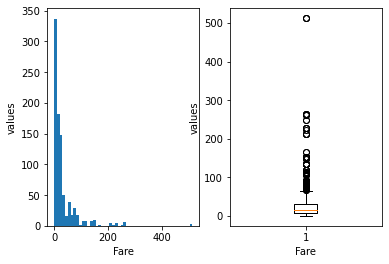

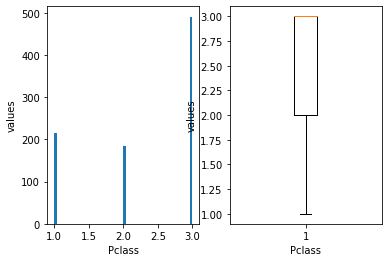

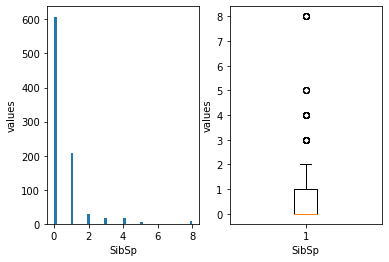

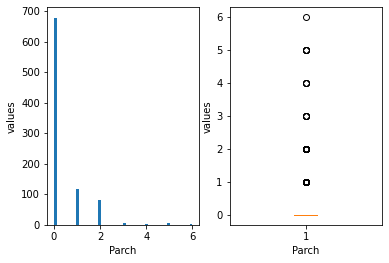

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


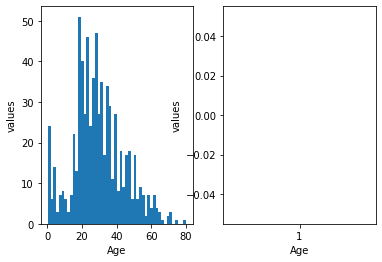

In [5]:
# 1. Univariate Analysis
# -> Numerical colums with histogram/distplot

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
for i in numCols:
  plt.subplot(1,2,1)
  plt.hist(train[i],bins=50)
  plt.xlabel(i)
  plt.ylabel('values')

  plt.subplot(1,2,2)
  plt.boxplot(train[i])
  plt.xlabel(i)
  plt.ylabel('values')

  plt.show()

In [6]:
# noted:outliers are present in the data

# 2.Univariate analysis of categorical columns by value_counts

for i in catCols:
  print('column:',i)
  print(train[i].value_counts())
  print('---------------------------------------------------------------------------------')

column: Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64
---------------------------------------------------------------------------------
column: Ticket
1601             7
CA. 2343         7
347082           7
CA 2144          6
347088           6
                ..
345774           1
367655           1
350406           1
SC/PARIS 2167    1
2695             1
Name: Ticket, Length: 681, dtype: int64
---------------------------------------------------------------------------------
column: Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F33            3
D              3
              ..
A26            1
C95            1
C111           1
D30            1
D11            1
Name: Cabin, Length: 147, dtype: int64
---------------------------------------------------------------------------------
column: Sex
male      577
female    314
Name: Sex, dtype: int64
---------------------------------------------------------------------------------


             PassengerId  Survived    Pclass  ...     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  ... -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481  ... -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000  ...  0.083081  0.018443 -0.549500
Age             0.036847 -0.077221 -0.369226  ... -0.308247 -0.189119  0.096067
SibSp          -0.057527 -0.035322  0.083081  ...  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443  ...  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  ...  0.159651  0.216225  1.000000

[7 rows x 7 columns]


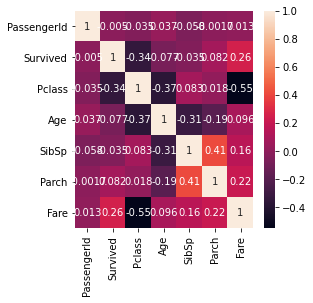

In [7]:
# Bi-variate analysis of Numerical features by cor-relation matrix

import seaborn as sns

matrix = train.corr()
print(matrix)

fig,ax = plt.subplots(figsize = (4,4))
sns.heatmap(matrix,annot = True)

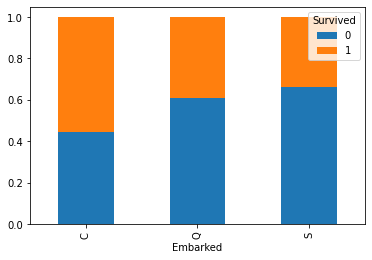

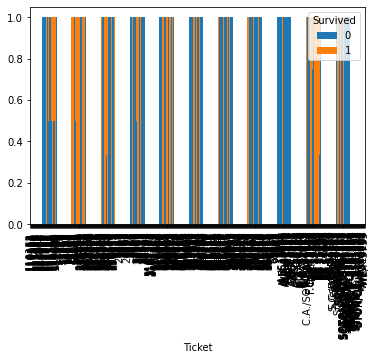

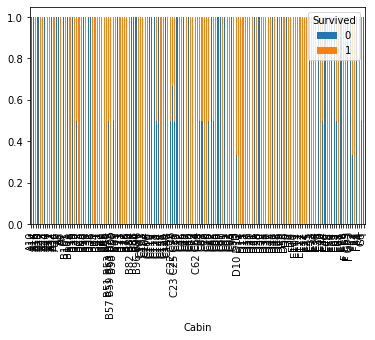

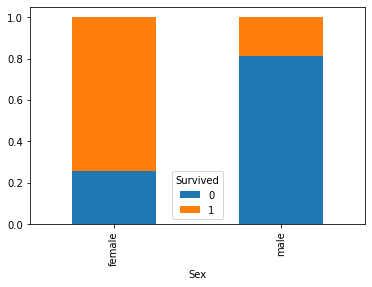

In [8]:
# Bivariate analysis of categorical feature by crosstab

for i in catCols:
  category = pd.crosstab(train[i],train.Survived)
  category.div(category.sum(1).astype(float),axis = 0).plot(kind='bar',stacked = True)
  plt.show()

4**. Towards building the model**
-----------------------------------------------------------------

In [9]:
na = train.shape[0]
nb = test.shape[0]
print('train-test rows:',na,nb)
data = pd.concat((train,test),sort = False).reset_index(drop=True)
# print(data.columns,data.shape)

# drop the SalePrice as it is target and Id column as it is unique for eaach row and irrevelant in prediction
data.drop(['Survived'],axis =1,inplace = True)
data.drop(['PassengerId'],axis=1,inplace = True)
data.drop(['Name'],axis=1,inplace = True)
print(data.columns,data.shape)
print('Total size of data is:',data.shape)

train-test rows: 891 418
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object') (1309, 9)
Total size of data is: (1309, 9)


5.Missing Values
--------------------------------------------------------------

In [10]:
print(data.isnull().sum())
print(data.isnull().mean()*100)

Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64
Pclass       0.000000
Sex          0.000000
Age         20.091673
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.076394
Cabin       77.463713
Embarked     0.152788
dtype: float64


In [11]:
# we will visualize the missing value percentage
def msv1(data,thresh=20,color='black',edgecolor ='black',width=15,height =3):
  plt.figure(figsize = (width,height))
  percentage = (data.isnull().mean())*100
  percentage.sort_values(ascending = False).plot.bar(color=color,edgecolor = edgecolor)
  plt.axhline(y = thresh,color = 'r',linestyle = '-')
  plt.title('Missing Values percentage per column',fontsize = 20,weight = 'bold')

  plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
  
  plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
  
  plt.xlabel('Columns',size=15,weight='bold')
  plt.ylabel('Missing values percentage',size=15,weight='bold')
  plt.yticks(weight='bold')

  return plt.show()

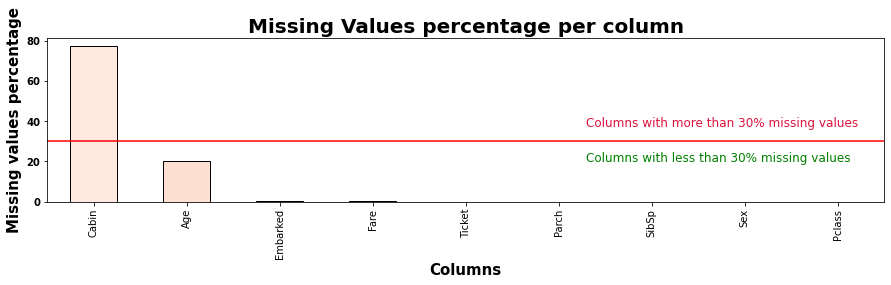

In [12]:
msv1(data,30,color=sns.color_palette('Reds',15))

In [13]:
# we will drop the columns with more than 30 % missing values
data_copy=data.dropna(thresh=len(data)*0.7,axis=1)
print(f'we dropped {(data.shape[1] - data_copy.shape[1])} features in the combined set')
print('Dropped features are :',[x for x in data.columns if x not in data_copy.columns])
print(f'The shape of the combined dataset after dropping features with more than 80% M.V. {data_copy.shape}')

we dropped 1 features in the combined set
Dropped features are : ['Cabin']
The shape of the combined dataset after dropping features with more than 80% M.V. (1309, 8)


In [14]:
allna = (data_copy.isnull().mean() ) * 100
allna=allna.drop(allna[allna == 0].index).sort_values()

# now visualising only missing values and their respective columns
def msv2(data_copy,color=('silver', 'gold','lightgreen','skyblue','lightpink'),edgecolor='black',width=16,height=8):
  fig, ax = plt.subplots(figsize=(width, height))

  allna = (data.isnull().mean())*100
  tightout= 0.008*max(allna)


  allna=allna.drop(allna[allna == 0].index).sort_values().reset_index()
  print(allna.shape)
  
  mn=ax.barh(allna.iloc[:,0],allna.iloc[:,1],color=color,edgecolor = edgecolor)
  ax.set_title('Missing values percentage per column',fontsize =15,weight = 'bold')
  ax.set_xlabel('Percentage',weight = 'bold',size =15 )
  ax.set_ylabel('Features with missing values', weight='bold')
  plt.yticks(weight='bold')
  plt.xticks(weight='bold')
  for i in ax.patches:
    
    ax.text(i.get_width()+ tightout, i.get_y()+0.1, str(round((i.get_width()), 2))+'%',fontsize=10, fontweight='bold', color='grey')

  return plt.show()

(4, 2)


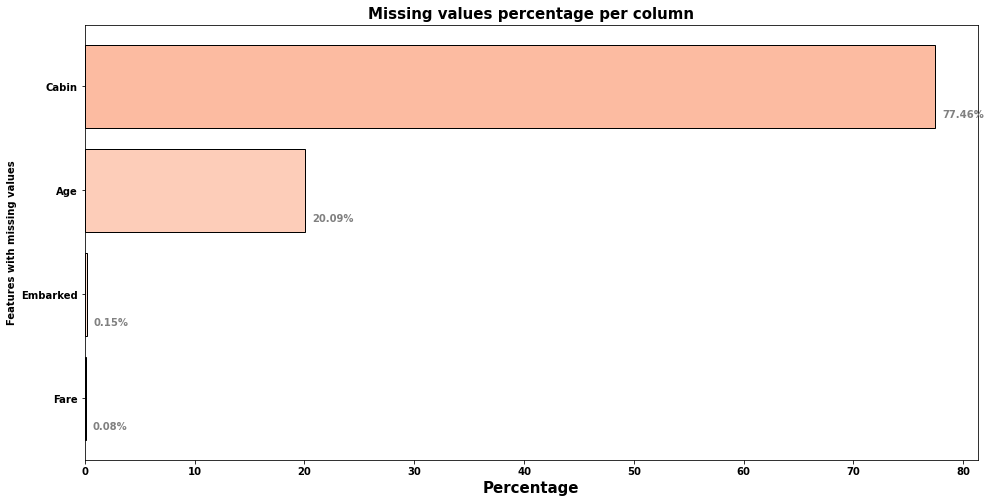

In [15]:
msv2(data_copy,color=sns.color_palette('Reds',15))

In [16]:
print(f'The shape of the combined dataset after dropping features with more than 80% M.V. {data_copy.shape}')

The shape of the combined dataset after dropping features with more than 80% M.V. (1309, 8)


**Splitting the missing values into categorical and Numeriacl column for better treatment**

In [17]:
NA=data_copy[allna.index.to_list()]
# splitting in categorical and numerical columns

NAcat = NA.select_dtypes(include='object')
NAnum = NA.select_dtypes(exclude='object')

print(f'we have : {NAcat.shape[1]} categorical features with missing values')
print(f'we have : {NAnum.shape[1]} numerical features with missing values')

print('çategorical columns with nA :',NAcat.columns)
print('numerical columns with nA :',NAnum.columns)

we have : 1 categorical features with missing values
we have : 2 numerical features with missing values
çategorical columns with nA : Index(['Embarked'], dtype='object')
numerical columns with nA : Index(['Fare', 'Age'], dtype='object')


**Treating numerical columns with missing values**
---------------------------------------------------------------

In [19]:
for i in NAnum:
  median_value = (data_copy[i].median())
  print(i+' - median val-',median_value)
  data_copy[i].fillna(median_value,inplace = True)
  # mask = data_copy[i].isnull()
  # print(mask)
  # data_copy.loc[mask, 'Age' ] = median_value

Fare - median val- 14.4542
Age - median val- 28.0


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


**Treating categorical columns with missing values**
-------------------------------------------------------------

In [20]:
for i in NAcat:
  mode_value = (data_copy[i].mode()[0])
  print(i+' - mode val-',mode_value)
  data_copy[i].fillna(mode_value,inplace = True)

Embarked - mode val- S


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
print(data_copy.isnull().sum())

**6.Feature Engineering:**
--------------------------------------------------------------

In [22]:
print(data_copy.Age)
print(data_copy.Age.max())
print(data_copy.Age.min())

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    28.0
1305    39.0
1306    38.5
1307    28.0
1308    28.0
Name: Age, Length: 1309, dtype: float64
80.0
0.17


In [25]:
data_copy.Ticket.value_counts()

# ticket can be dropped ,

data_copy.drop('Ticket',axis = 1,inplace =True)
data_update = pd.get_dummies(data_copy)
print(f"the shape of the original dataset {data_copy.shape}")
print(f"the shape of the encoded dataset {data_update.shape}")
print(f"We have {data_update.shape[1]- data_copy.shape[1]} new encoded features")

the shape of the original dataset (1309, 7)
the shape of the encoded dataset (1309, 10)
We have 3 new encoded features


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
data_update.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [28]:
# splitting train test
Train = data_update[:na]
Test = data_update[na:]

print(data_update.shape)
print(Train.shape)
print(Test.shape)

(1309, 10)
(891, 10)
(418, 10)


In [29]:
# outlier treatment
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
data1 = Train.values
X,y = data1[: , :],train['Survived']
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(891, 10) (891,)
(712, 10) (712,)
(642, 10) (642,)


# **8. Towards Machine Learning modelling:**
# -----------------------------------------------------------------

In [32]:

# we will import robust scaler as its is powerfulagainst outliers
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()

In [33]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(Test)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from numpy import abs
# from sklearn.metrics import mean_squared_error,mean_absolute_error
# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

models = []
names = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn ',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))
# models.append(('Decision Tree',RandomForestClassifier()))
# # models.append(('Random Forest',RandomForestRegressor()))

for name,model in models:
  cv_score = model_selection.cross_val_score(model,x_train,y_train,cv = 20,scoring='accuracy')
  cv_score = np.sqrt(np.abs(cv_score))

  
  print("name:--->>",name)
  print("----------------------------------")
  print("CV mean Score :{0},CV min:{1},CV std :{2}".format(np.mean(cv_score),np.min(cv_score),np.std(cv_score)))
  print("----------------------------------")

name:--->> Logistic Regression
----------------------------------
CV mean Score :0.8890519823166437,CV min:0.816496580927726,CV std :0.03113114993734944
----------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

name:--->> Linear svc
----------------------------------
CV mean Score :0.8898111954279473,CV min:0.778498944161523,CV std :0.035718471668872535
----------------------------------
name:--->> Random forest classifier
----------------------------------
CV mean Score :0.9079840819680403,CV min:0.8477912478906585,CV std :0.037011229850946806
----------------------------------
name:--->> knn 
----------------------------------
CV mean Score :0.8904883469400222,CV min:0.7977240352174656,CV std :0.039218359496573464
----------------------------------
name:--->> Guassian NB 
----------------------------------
CV mean Score :0.8939780082250254,CV min:0.7977240352174656,CV std :0.03950818355217223
----------------------------------
name:--->> Decision TreeClassifier
----------------------------------
CV mean Score :0.8909409358514274,CV min:0.82915619758885,CV std :0.02616249408810707
----------------------------------


In [39]:
# Selecting a model
# ------------------------------------------------------------------------

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

98.6

In [41]:
# submission
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

In [46]:
submission.to_csv('C://Users//Shila Kumari//Desktop//GITHUB//datasets//titanic//submission.csv', index=False)

In [45]:
!pip install fsspec

     |████████████████████████████████| 92kB 4.0MB/s 
